In [1]:
import ctypes
import os
from time import sleep
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:\Program Files\Thorlabs\Kinesis')

In [3]:
lib = ctypes.windll.LoadLibrary(r'C:\Program Files\Thorlabs\Kinesis\ThorLabs.MotionControl.KCube.StrainGauge.dll')

In [4]:
lib.TLI_BuildDeviceList()

0

In [5]:
nDev = lib.TLI_GetDeviceListSize()

In [6]:
devID = 59
TL_cBufSize = 100
sBuf = ctypes.c_buffer(TL_cBufSize)
if lib.TLI_GetDeviceListByTypeExt(sBuf, TL_cBufSize, devID) != 0:
    print("ERROR", "No devices of type {0} found".format(devID))


In [7]:
sBuf.value.decode().rsplit(",")[0:-1]

['59000019']

In [8]:
serNr = 59000019
serNrStr= ctypes.c_char_p(serNr.__str__().encode("ascii"))

serNrStrList = sBuf.value.decode().rsplit(",")[0:-1]
if not(serNr.__str__() in serNrStrList):
    print("ERROR", "No device with S/N {0} found".format(serNr)) 

In [9]:
lib.SG_Open(serNrStr)

0

In [137]:
lib.SG_SetZero(serNrStr)

0

In [132]:
lib.SG_SetDisplayMode(serNrStr,1)

0

In [61]:
overrange = ctypes.c_bool(0)

In [142]:
milisec = 10
lib.SG_StartPolling(serNrStr,milisec)

1

In [143]:
pos = np.array([])
i= 0
while i < 1001:
    sleep(0.01)
    pos = np.append(pos,np.array([lib.SG_GetReadingExt(serNrStr, False, ctypes.byref(overrange))]))
    #print(pos[-1])
    i+=1

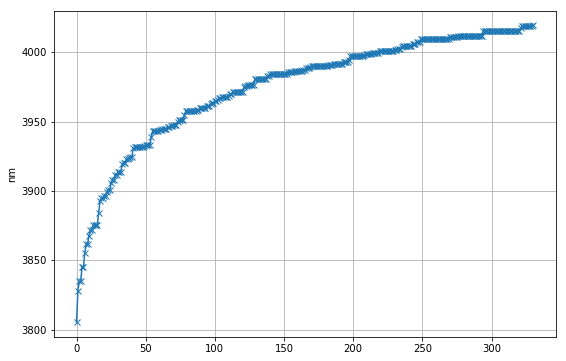

In [147]:
plt.plot(pos[670:]/32767*20.0*1000,'x-')
plt.grid()
plt.ylabel('nm')
plt.show()

In [145]:
lib.SG_StopPolling(serNrStr)

15